In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
print(os.listdir("E:\Dataset"))

sns.set_style({'xtick.bottom':False,
               'ytick.left':False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})

['cell_images', 'cell_images.zip']


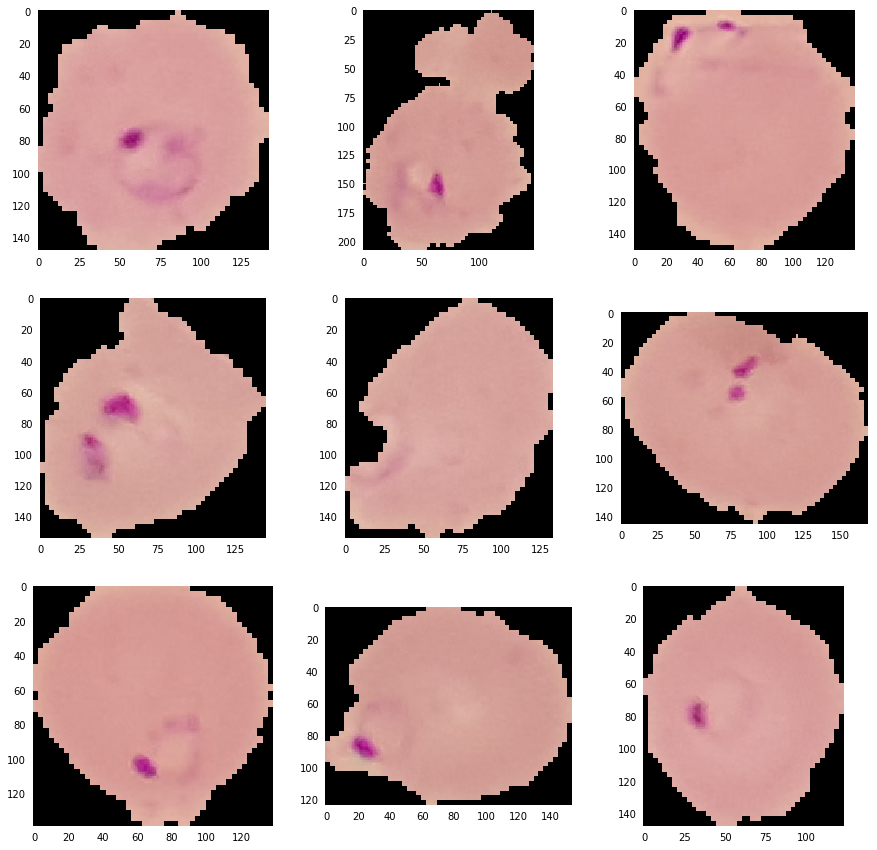

In [4]:
im_list = [162+i for i in range(9)]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
for i in enumerate(im_list):
    img = plt.imread("E:\Dataset/cell_images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_"+str(i[1])+".png")
    ax=axes[i[0]//3,i[0]%3]
    ax.imshow(img)           

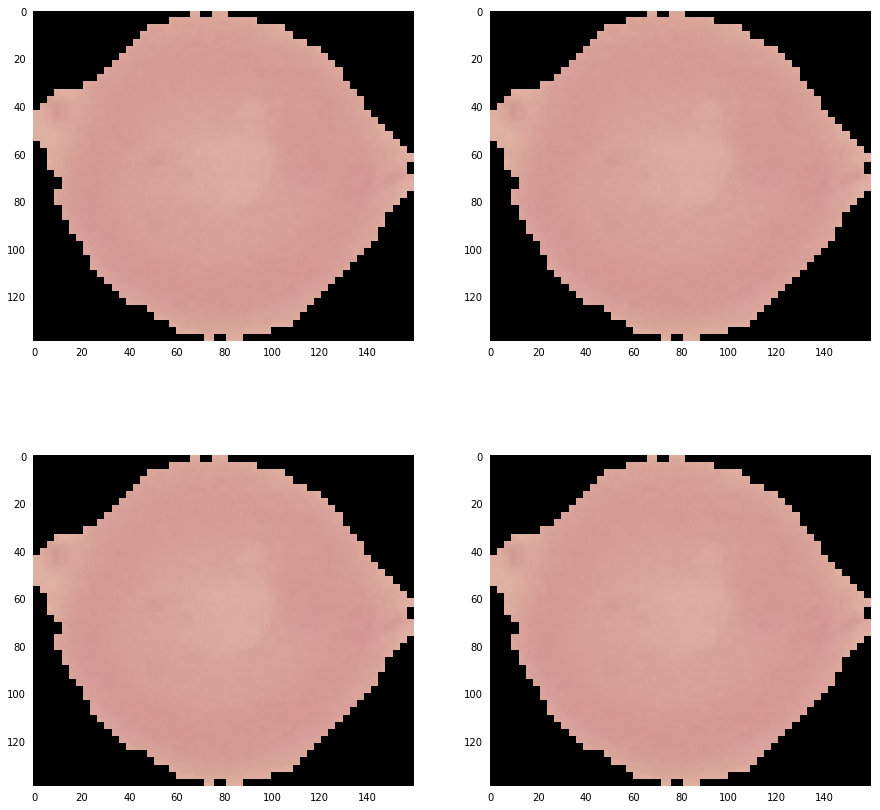

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
img1 = plt.imread("E:\Dataset/cell_images/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png")
img2 = plt.imread("E:\Dataset/cell_images/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png")
img3 = plt.imread("E:\Dataset/cell_images/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png")
img4 = plt.imread("E:\Dataset/cell_images/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png")

ax = axes[0,0]
ax1 = axes[0,1]
ax2 = axes[1,0]
ax3 = axes[1,1]

ax.imshow(img1)
ax1.imshow(img2)
ax2.imshow(img3)
ax3.imshow(img4)

In [8]:
classifier = Sequential()
#Adding 1st Convolution and Pooling Layer
classifier.add(Conv2D(32,kernel_size=(3,3),input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

#Adding 2nd Convolution and Pooling Layer
classifier.add(Conv2D(32,kernel_size=(3,3),activation = 'relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

#Adding 3rd Convolution and Pooling Layer
classifier.add(Conv2D(32,kernel_size=(3,3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

#Adding 4th Convolution and Pooling Layer
classifier.add(Conv2D(32,kernel_size=(3,3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

#Flattening
classifier.add(Flatten())

classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

path = "E:\Dataset/cell_images/cell_images"
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
parasite_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
uninfected_datagen = ImageDataGenerator(rescale=1./255)
parasite_data = parasite_datagen.flow_from_directory(path,
                                                     target_size=(64,64),
                                                     batch_size=32,
                                                     class_mode = 'binary')
uninfected_data = uninfected_datagen.flow_from_directory(path,
                                                        target_size=(64,64),
                                                        batch_size=32,
                                                        class_mode = 'binary')

Found 27558 images belonging to 2 classes.
Found 27558 images belonging to 2 classes.


In [9]:
accuracies = classifier.fit_generator(parasite_data,
                         steps_per_epoch = 100,
                         epochs = 30,
                         validation_data = uninfected_data,
                         validation_steps = 50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 37s 367ms/step - loss: 0.6867 - acc: 0.5591 - val_loss: 0.6357 - val_acc: 0.6469
Epoch 2/30
100/100 [==============================] - 45s 453ms/step - loss: 0.5460 - acc: 0.7356 - val_loss: 0.4524 - val_acc: 0.8131
Epoch 3/30
100/100 [==============================] - 47s 467ms/step - loss: 0.3507 - acc: 0.8600 - val_loss: 0.2148 - val_acc: 0.9487
Epoch 4/30
100/100 [==============================] - 44s 438ms/step - loss: 0.2256 - acc: 0.9253 - val_loss: 0.2073 - val_acc: 0.9300
Epoch 5/30
100/100 [==============================] - 44s 442ms/step - loss: 0.1991 - acc: 0.9297 - val_loss: 0.1625 - val_acc: 0.9506
Epoch 6/30
100/100 [==============================] - 43s 430ms/step - loss: 0.1943 - acc: 0.9400 - val_loss: 0.1805 - val_acc: 0.9475
Epoch 7/30
100/100 [==============================] - 42s 424ms/step - loss: 0.1782 - acc: 0.9453 - val_loss: 0.1592 - val_acc: 0.9475
Epoch 8

In [10]:
acc = pd.DataFrame.from_dict(accuracies.history)
acc = pd.concat([pd.Series(range(0,30),name='epochs'),acc],axis=1)
acc.head()

,epochs,val_loss,val_acc,loss,acc
0,0,0.635682,0.646875,0.686729,0.559063
1,1,0.452405,0.813125,0.546046,0.735625
2,2,0.214847,0.948750,0.350704,0.860000
3,3,0.207333,0.930000,0.225601,0.925312
4,4,0.162462,0.950625,0.199062,0.929688


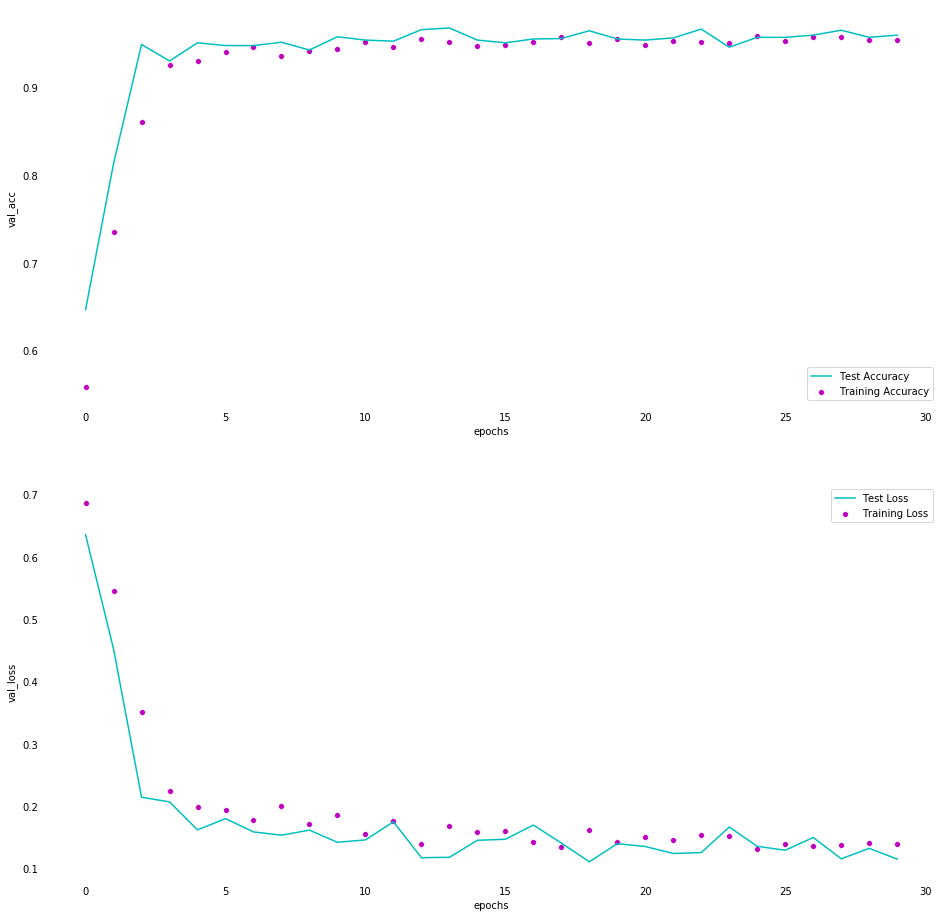

In [11]:
fig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(16,16))
sns.scatterplot(x='epochs',y='acc',data=acc,ax=ax,color='m')
sns.lineplot(x='epochs',y='val_acc',data=acc,ax=ax,color='c')
sns.scatterplot(x='epochs',y='loss',data=acc,ax=ax1,color='m')
sns.lineplot(x='epochs',y='val_loss',data=acc,ax=ax1,color='c')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])